In [2]:
import numpy as np
import matplotlib.pyplot as plt

The eigenvalues are
$$	\lambda_{\pm\pm}=\frac
	{-D\pm\sqrt{D^2-2\mu q^2 \pm 2\sqrt{\Delta}q^2}}
	{2},
$$
where we have defined
$$
\begin{align*}
	\mu &\equiv \frac{2 + \eta_{AA} + \eta_{BB}}{2}, \\
	\Delta &\equiv \frac{(\eta_{AA}-\eta_{BB})^2}{4} + \eta_{AB} \eta_{BA}.
\end{align*}
$$

In [3]:
def cal_mu(eta_AA, eta_BB, psi_A=1, psi_B=1):
    return 1 + 0.5 * (psi_A * eta_AA + psi_B * eta_BB)

def cal_Delta(eta_AB, eta_BA, eta_AA, eta_BB, psi_A=1, psi_B=1):
    return 0.25 * (psi_A * eta_AA - psi_B * eta_BB)**2 + psi_A * psi_B * eta_AB * eta_BA

The condition $q^* > q_-$ is equivalent to
$$
	\frac{-\Delta}{\mu} > \left(\frac{-\Delta}{\mu}\right)^* \equiv \left\{
	\begin{aligned}
		&\frac{1}{2}
		&\mathrm{if}\quad\frac{v_0 q^*}{D_r} \geq 4, \\
		&2 \left(\frac{v_0 q^*}{16 D_r} + \frac{D_r}{v_0 q^*}\right)^2
		&\mathrm{if}\quad\frac{v_0 q^*}{D_r} < 4,
	\end{aligned}
	\right.
$$

In [4]:
def cal_minus_Delta_over_mu(Dr, v0=1, qc=np.pi*2):
    x = v0 * qc / Dr
    if x >= 4:
        return 0.5
    else:
        return 2 * (x/16 + 1/x) ** 2

or
$$
	\frac{D_r}{v_0} < \left(\frac{D_r}{v_0}\right)^* \equiv \left\{
	\begin{aligned}
		&0
		&\mathrm{if}\quad \frac{-\Delta}{\mu}\leq \frac{1}{2}, \\
		&\frac{q^*}{2} \left(
		\sqrt{-\frac{\Delta}{2\mu}}+\sqrt{-\frac{\Delta}{2\mu}-\frac{1}{4}}
		\right)
		&\mathrm{if}\quad\ \frac{-\Delta}{\mu}> \frac{1}{2},
	\end{aligned}
	\right.
$$

In [5]:
def cal_Dr_over_v0(mu, Delta, qc=np.pi*2):
    x = -Delta / mu
    if isinstance(x, np.ndarray):
        y = np.zeros_like(x)
        mask = x <= 0.5
        y[mask] = 0
        mask = x > 0.5
        y[mask] = 0.5 * qc * (np.sqrt(x[mask]/2) + np.sqrt(x[mask]/2 - 0.25))
        return y
    else:
        if x <= 0.5:
            return 0
        else:
            return 0.5 * qc * (np.sqrt(x/2) + np.sqrt(x/2 - 0.25))

The instability conditions are
$$\left\{\begin{aligned}
		\Delta \geq 0&\ \cap\ (\mu \leq 0\ \cup\ \Delta > \mu^2)
		\quad\Rightarrow\quad \mathrm{static\ pattern}\\
		\Delta < 0&\ \cap\ \left\{\begin{aligned}
			&\mu \leq 0  \quad\Rightarrow \quad\mathrm{dynamic\ pattern\ i} \\
			&\mu > 0\ \cap\ q^*> q_-
			\quad\Rightarrow \quad\mathrm{dynamic\ pattern\ ii}
		\end{aligned}
		\right.
	\end{aligned}
\right.	
$$

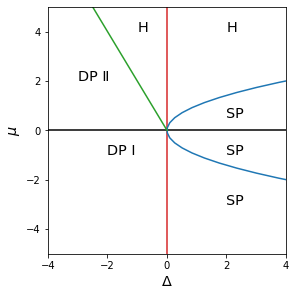

In [6]:
def PD_Delta_mu(Dr, v0=1, qc=np.pi*2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    # Delta
    x = np.linspace(-5, 5)

    # mu
    y = np.linspace(-5, 5)

    ax.axvline(0, c="tab:red", label=r"$\Delta=0$")
    ax.axhline(0, c="k", label=r"$\mu=0$")

    # Delta = mu **2
    x1 = y ** 2
    ax.plot(x1, y, c="tab:blue", label=r"$\Delta=\mu^2$")

    # minus Delta over mu
    k = cal_minus_Delta_over_mu(Dr, v0, qc)
    y2 = np.linspace(0, y.max(), 100)  # mu > 0
    x2 = -k * y2
    # label = r"$\frac{-\Delta}{\mu}=\left(\frac{-\Delta}{\mu}\right)^*$"
    label = r"$-\Delta/\mu = (-\Delta/\mu)^*$"
    ax.plot(x2, y2, c="tab:green", label=label)  # q*=q_-
    # plt.plot(-0.5 * y2, y2)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-5, 5)
    ax.set_xlabel(r"$\Delta$", fontsize="x-large")
    ax.set_ylabel(r"$\mu$", fontsize="x-large")
    ax.text(-2, -1, "DP " + u"\u2160", fontsize="x-large")
    ax.text(-3, 2, "DP " + u"\u2161", fontsize="x-large")
    ax.text(-1, 4, "H", fontsize="x-large")
    ax.text(2, 4, "H", fontsize="x-large")
    ax.text(2, 0.5, "SP", fontsize="x-large")
    ax.text(2, -1, "SP", fontsize="x-large")
    ax.text(2, -3, "SP", fontsize="x-large")
    # ax.legend()

    if flag_show:
        plt.show()
        plt.close()

PD_Delta_mu(0.1)


$$	
\left\{
\begin{aligned}
    \left |\frac{\alpha}{\eta}\right |\leq 1 &\ \cap\ (\eta \leq -1 \ \cup\ \eta < -\frac{1+\alpha^2}{2}) \quad\Rightarrow\quad\mathrm{static\ pattern} \\
    \left |\frac{\alpha}{\eta}\right |> 1 &\ \cap\  \left\{
        \begin{aligned}
            &\eta \leq -1 \quad\Rightarrow \quad\mathrm{dynamic\ pattern\ i}\\
            &\eta > -1\ \cap\ q^* > q_-
            \quad\Rightarrow \quad\mathrm{dynamic\ pattern\ ii}
        \end{aligned}
    \right.
\end{aligned}
\right.
$$

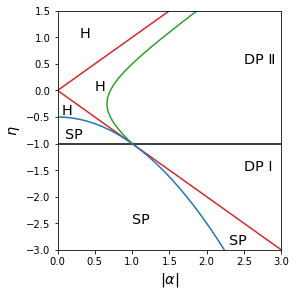

In [7]:
def PD_alpha_eta(Dr, v0=1, qc=np.pi*2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    alpha = np.linspace(0, 5)
    eta = np.linspace(-5, 5)
    
    # Exceptional Lines
    ax.plot(alpha, alpha, c="tab:red", label=r"$|\alpha/\eta|=1$")
    ax.plot(alpha, -alpha, c="tab:red")

    ax.axhline(-1, c="k", label=r"$\eta=-1$")

    y = -(1 + alpha**2)/2
    ax.plot(alpha, y, c="tab:blue", label=r"$\eta=-(1+\alpha^2)/2$")
    # ax.fill_between(alpha, -3.0, y, alpha=0.5)


    # minus Delta over mu
    k = cal_minus_Delta_over_mu(Dr, v0, qc)
    y = np.linspace(-1, eta.max())  # eta < -1
    x = np.sqrt((1+y)* k + y**2)
    label = r"$-\Delta/\mu = (-\Delta/\mu)^*$"
    ax.plot(x, y, label=label, c="tab:green")

    ax.set_xlim(0, 3)
    ax.set_ylim(-3, 1.5)
    ax.set_xlabel(r"$|\alpha|$", fontsize="x-large")
    ax.set_ylabel(r"$\eta$", fontsize="x-large")

    ax.text(2.5, -1.5, "DP " + u"\u2160", fontsize="x-large")
    ax.text(2.5, 0.5, "DP " + u"\u2161", fontsize="x-large")
    # ax.text(2.5, -1.5, "DP", fontsize="x-large")
    ax.text(0.3, 1.0, "H", fontsize="x-large")
    ax.text(0.5, 0, "H", fontsize="x-large")
    ax.text(0.05, -0.45, "H", fontsize="x-large")
    ax.text(2.3, -2.9, "SP", fontsize="x-large")
    ax.text(1.0, -2.5, "SP", fontsize="x-large")
    ax.text(0.1, -0.9, "SP", fontsize="x-large")

    # ax.legend(loc="upper right")    
    if flag_show:
        plt.show()
        # plt.savefig("PD_rho_eq.pdf")
        plt.close()

PD_alpha_eta(0.02, qc=np.pi/4)



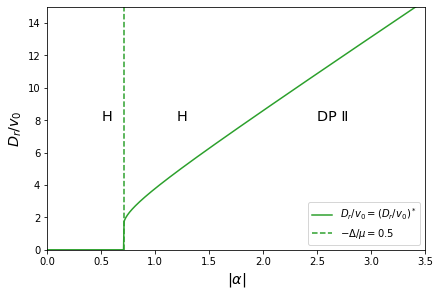

In [8]:
def PD_alpha_Dr(eta=0, v0=1, qc=np.pi*2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False
    
    alpha = np.linspace(0, 5, 1000)
    mu = cal_mu(eta, eta)
    Delta = cal_Delta(eta + alpha, eta - alpha, eta, eta)
    Dr = cal_Dr_over_v0(mu, Delta, qc) * v0
    line, = ax.plot(alpha, Dr, c="tab:green", label=r"$D_r/v_0=(D_r/v_0)^*$")
    alpha_c = np.sqrt(0.5 * (1+eta) + eta**2)
    ax.axvline(alpha_c, linestyle="dashed", c=line.get_c(), label=r"$-\Delta/\mu=0.5$")
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0, 15)
    ax.set_xlabel(r"$|\alpha|$", fontsize="x-large")
    ax.set_ylabel(r"$D_r/v_0$", fontsize="x-large")

    ax.text(2.5, 8, "DP " + u"\u2161", fontsize="x-large")
    ax.text(0.5, 8, "H", fontsize="x-large")
    ax.text(1.2, 8, "H", fontsize="x-large")

    ax.legend()
    if flag_show:
        plt.show()
        plt.close()

PD_alpha_Dr()

$$
	\left\{
	\begin{aligned}
		\eta_{AB}=0 &\ \cap\ \eta < -1 \quad\Rightarrow\quad\mathrm{static\ pattern} \\
		\eta_{AB}\neq 0 &\ \cap\  \left\{
		\begin{aligned}
			&\eta \leq -1 \quad\Rightarrow\quad \mathrm{dynamic\ pattern\ i}\\
			&\eta > -1\ \cap\ q^* > q_-
			\quad\Rightarrow\quad \mathrm{dynamic\ pattern\ ii}
		\end{aligned}
		\right.
	\end{aligned}
	\right.
$$

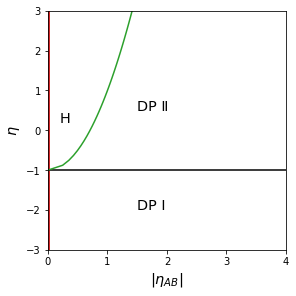

In [9]:
def PD_etaAB_eta(Dr, v0=1, qc=np.pi*2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4),  constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    etaAB = np.linspace(0, 5)
    eta = np.linspace(-5, 0)
    
    ax.axvline(0, c="tab:red", label=r"$\eta_{AB}=0$", lw=4)
    # ax.plot(alpha, alpha, c="tab:red", label=r"$|\alpha/\eta|=1$")
    ax.axhline(-1, c="k", label=r"$\eta=-1$")

    # minus Delta over mu
    k = cal_minus_Delta_over_mu(Dr, v0, qc)
    y = np.linspace(-1, 5)  # eta < -1
    x = np.sqrt((1+y)* k)
    label = r"$-\Delta/\mu = (-\Delta/\mu)^*$"
    ax.plot(x, y, label=label, c="tab:green")

    ax.set_xlim(0, 4)
    ax.set_ylim(-3, 3)
    ax.set_xlabel(r"$|\eta_{AB}|$", fontsize="x-large")
    ax.set_ylabel(r"$\eta$", fontsize="x-large")

    ax.text(1.5, -2, "DP " + u"\u2160", fontsize="x-large")
    ax.text(1.5, 0.5, "DP " + u"\u2161", fontsize="x-large")
    ax.text(0.2, 0.2, "H", fontsize="x-large")

    # ax.legend()    
    if flag_show:
        plt.show()
        plt.close()

PD_etaAB_eta(0.1)    


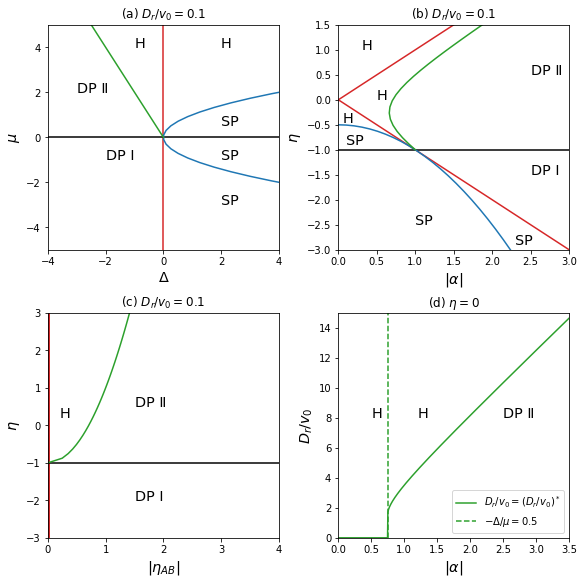

In [10]:
def four_PDs():
    fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(8, 8))

    Dr = 0.1
    PD_Delta_mu(Dr, ax=axes[0, 0])
    PD_alpha_eta(Dr, ax=axes[0, 1])
    PD_etaAB_eta(Dr, ax=axes[1, 0])
    PD_alpha_Dr(Dr, ax=axes[1, 1])

    axes[0, 0].set_title(r"(a) $D_r/v_0=0.1$")
    axes[0, 1].set_title(r"(b) $D_r/v_0=0.1$")
    axes[1, 0].set_title(r"(c) $D_r/v_0=0.1$")
    axes[1, 1].set_title(r"(d) $\eta=0$")

    plt.show()
    # plt.savefig("PD_rho_p_eq.pdf")
    plt.close()

four_PDs()